[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
C:\Users\sasay\AppData\Local\Temp\ipykernel_31772\1337613576.py:28: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = price_data.pct_change()
C:\Users\sasay\AppData\Local\Temp\ipykernel_31772\1337613576.py:38: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_momentum = momentum.resample("M").last()
C:\Users\sasay\AppData\Local\Temp\ipykernel_31772\1337613576.py:39: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME

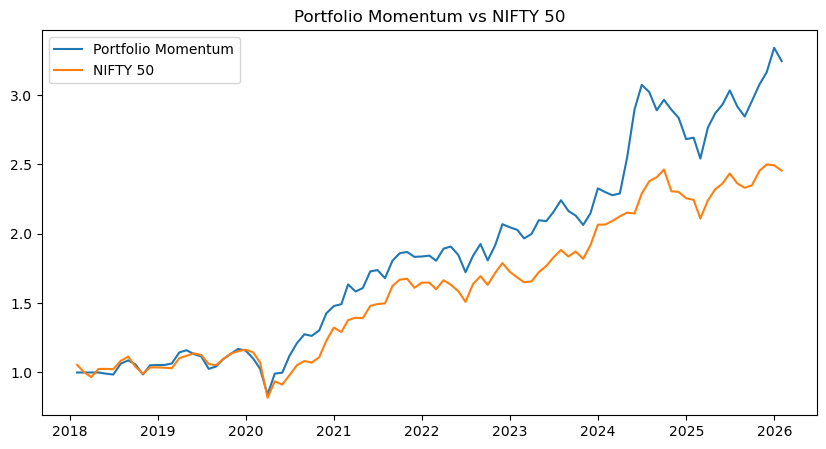

In [11]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# 1. Define universe
# -----------------------------
tickers = {
    "HDFCBANK": "HDFCBANK.NS",
    "RELIANCE": "RELIANCE.NS",
    "HINDZINC": "HINDZINC.NS",
    "NIFTY50": "^NSEI"
}

start_date = "2018-01-01"
window = 60

# -----------------------------
# 2. Download data & returns
# -----------------------------
price_data = pd.DataFrame()

for name, ticker in tickers.items():
    data = yf.download(ticker, start=start_date)
    price_data[name] = data["Close"]

returns = price_data.pct_change()

# -----------------------------
# 3. Momentum calculation
# -----------------------------
momentum = returns.rolling(window).sum()

# -----------------------------
# 4. Monthly rebalancing
# -----------------------------
monthly_momentum = momentum.resample("M").last()
monthly_returns = returns.resample("M").sum()

# -----------------------------
# 5. Rank assets
# -----------------------------
ranks = monthly_momentum.rank(axis=1, ascending=False)

# -----------------------------
# 6. Select top 4 assets
# -----------------------------
top_n = 4
signals = (ranks <= top_n).astype(int)

# -----------------------------
# 7. Equal-weight portfolio
# -----------------------------
weights = signals.div(signals.sum(axis=1), axis=0)

# Shift to avoid look-ahead bias
portfolio_returns = (weights.shift(1) * monthly_returns).sum(axis=1)

# -----------------------------
# 8. Performance
# -----------------------------
portfolio_cum = (1 + portfolio_returns).cumprod()
market_cum = (1 + monthly_returns["NIFTY50"]).cumprod()

# -----------------------------
# 9. Plot
# -----------------------------
plt.figure(figsize=(10,5))
plt.plot(portfolio_cum, label="Portfolio Momentum")
plt.plot(market_cum, label="NIFTY 50")
plt.legend()
plt.title("Portfolio Momentum vs NIFTY 50")
plt.show()


In [12]:
# Sharpe Ratio (annualized)
risk_free_rate = 0.0

sharpe_ratio = (
    (portfolio_returns.mean() - risk_free_rate)
    / portfolio_returns.std()
) * np.sqrt(12)

print("Sharpe Ratio:", round(sharpe_ratio, 2))


Sharpe Ratio: 0.9


In [13]:
# Maximum Drawdown
rolling_max = portfolio_cum.cummax()
drawdown = (portfolio_cum - rolling_max) / rolling_max
max_drawdown = drawdown.min()

print("Max Drawdown:", round(max_drawdown * 100, 2), "%")


Max Drawdown: -28.13 %
